# Hypothese: 

##### US seems to have the most gun violence reported compared to other countries. Does this because of the Right-To-Carry (RTC) that allows people carrying gun?

##### This study focus the relation of mass_shooting vs RTC law

# Steps/Agenda:

        Part_1: Collecting data
        Part_2: Cleaning data
        Part_3: EDA
        Part_4: Modelling & Training data
        Part_5: Validate model with metric

# PART_1: COLLECTING DATA

In [143]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

##### My plan was to scrape data from the website & put it into 1 csv file. However, as I was not successful with my script, I am downloading the data from the web, then join them together. This process is manual, taking too much time and not allow me to get all data during the time frame i want. Another cons of this manual approach is my sample seems to be selected and not random 

In [144]:
df1 = pd.read_csv(os.path.join('Mass_Shooting_1.csv'))
df2 = pd.read_csv(os.path.join('Mass_Shooting_2.csv'))
df3 = pd.read_csv(os.path.join('Mass_Shooting_3.csv'))
df4 = pd.read_csv(os.path.join('Mass_Shooting_4.csv'))
df5 = pd.read_csv(os.path.join('Mass_Shooting_5.csv'))

In [145]:
#join all dataframe together with pandas concat

frames = [df1, df2, df3, df4, df5]

df123 = pd.concat(frames)

df123

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"August 8, 2017",Illinois,Chicago,1 block of East 37th Street,1,6,NaN
1,"August 6, 2017",New York,Bronx,Wickham Ave,0,6,NaN
2,"August 6, 2017",New York,Bronx,Unionport Rd,0,4,NaN
3,"August 6, 2017",California,Oakland,1000 block of 106th Avenue,0,7,NaN
4,"August 5, 2017",New Jersey,Lakewood,900 block of Brook Road,0,4,NaN
5,"August 5, 2017",South Carolina,Allendale,300 block of Ellis St,1,3,NaN
6,"August 5, 2017",Florida,Tallahassee,1939 W Tennessee St,1,3,NaN
7,"August 4, 2017",Montana,Lodge Grass,200 block of North Helen Street,3,2,NaN
8,"August 3, 2017",District of Columbia,Washington,3426 18th St NE,1,3,NaN
9,"August 2, 2017",Indiana,South Bend,2122 Frederickson St,2,2,NaN


##### After getting the number of incident report by state, next step is to create a csv file that has gun carry law per state. I was expected to have only 1 variable with yes/no value. Suprising, so many different type to permit, carry law existing. Also, many empty cell that seems to mean NO, but unsure

In [146]:
Law_df = pd.read_csv(os.path.join('Gun_Law.csv'))
Campus_df = pd.read_csv(os.path.join('Gun_On_Campus.csv'))

In [147]:
Law_And_Campus_df = pd.merge(Law_df, Campus_df, on="State")
Law_And_Campus_df

,State,Unrestricted,Shall-issue,May-issue,No-issue,Non-Resident Permits Available,Permit Reciprocity[26],Campus_Carried
0,Alabama,NaN,Yes,NaN,NaN,No,Yes,Depend
1,Alaska,Yes,Yes,NaN,NaN,No,Yes,Depend
2,Arizona,Yes,Yes,NaN,NaN,Yes,Yes,Depend
3,Arkansas,NaN,Yes,NaN,NaN,No,Yes,Yes
4,California,NaN,NaN,Yes,NaN,No,No,No
5,Colorado,NaN,Yes,NaN,NaN,No,Yes,Yes
6,Connecticut,NaN,NaN,Yes,NaN,Yes,No,Depend
7,Delaware,NaN,NaN,Yes,NaN,Yes,Yes,Depend
8,District of Columbia,NaN,NaN,Yes,NaN,Yes,No,Depend
9,Florida,NaN,Yes,NaN,NaN,Yes,Yes,Limited


##### Merge the 2 files together

In [148]:
df = pd.merge(df123, Law_And_Campus_df, on="State")
df

,Incident Date,State,City Or County,Address,# Killed,# Injured,...,Shall-issue,May-issue,No-issue,Non-Resident Permits Available,Permit Reciprocity[26],Campus_Carried
0,"August 8, 2017",Illinois,Chicago,1 block of East 37th Street,1,6,...,Yes,NaN,NaN,Yes,Yes,No
1,"August 1, 2017",Illinois,Chicago,800 block of N Monticello Ave,0,4,...,Yes,NaN,NaN,Yes,Yes,No
2,"July 31, 2017",Illinois,Decatur,Jasper St and Main St,0,4,...,Yes,NaN,NaN,Yes,Yes,No
3,"July 27, 2017",Illinois,Chicago,2000 block of E 71st St,1,4,...,Yes,NaN,NaN,Yes,Yes,No
4,"July 23, 2017",Illinois,Chicago,1500 block of East 82nd St,1,3,...,Yes,NaN,NaN,Yes,Yes,No
5,"July 15, 2017",Illinois,Chicago,12200 block of S Throop St,0,4,...,Yes,NaN,NaN,Yes,Yes,No
6,"July 8, 2017",Illinois,Alton,700 block of Oakwood,0,4,...,Yes,NaN,NaN,Yes,Yes,No
7,"July 5, 2017",Illinois,Chicago (Roseland),11000 block of S Eberhart,2,2,...,Yes,NaN,NaN,Yes,Yes,No
8,"July 1, 2017",Illinois,Momence,2727 S 13000 Rd E,0,4,...,Yes,NaN,NaN,Yes,Yes,No
9,"June 27, 2017",Illinois,Chicago,200 block of S Lotus,0,5,...,Yes,NaN,NaN,Yes,Yes,No


# PART_2: CLEANING DATA

##### As I do not want to look at the incent at the daily leve, I will use the feature engineering process to create an incident_ year columns from the provided incident date.

In [149]:
df['Year'] = pd.DatetimeIndex(df['Incident Date']).year

##### After retrieve the year, incident_date column seem to be irrelevant, as well as Address & Operation. So, I will remove these columns from  my dataset

In [150]:
del df['Incident Date']
del df['Operations']
del df['Address']
del df['City Or County']
df

,State,# Killed,# Injured,Unrestricted,Shall-issue,May-issue,No-issue,Non-Resident Permits Available,Permit Reciprocity[26],Campus_Carried,Year
0,Illinois,1,6,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
1,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
2,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
3,Illinois,1,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
4,Illinois,1,3,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
5,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
6,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
7,Illinois,2,2,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
8,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017
9,Illinois,0,5,NaN,Yes,NaN,NaN,Yes,Yes,No,2017


##### Rename certain columns for easier coding

In [184]:
df = df.rename(index=str, columns={"# Killed":"Number_Killed",
                                   "# Injured": "Number_Injured",
                                   "Permit Reciprocity[26]": "Permi Reciprocity"})

##### As my hypothesis is only to find if there is a positive relationship between RTC vs Gun Incident Report, I do not need both column Kill & Injured. Will group both of them into a column call Incident_Cnt

In [185]:
df['Incident_cnt'] = df["Number_Killed"] + df["Number_Injured"]  # assigned to a column

In [186]:
df

,State,Number_Killed,Number_Injured,Unrestricted,Shall-issue,May-issue,No-issue,Non-Resident Permits Available,Permit Reciprocity,Campus_Carried,Year,Incident_cnt
0,Illinois,1,6,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,7
1,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
2,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
3,Illinois,1,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,5
4,Illinois,1,3,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
5,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
6,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
7,Illinois,2,2,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
8,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
9,Illinois,0,5,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,5


##### There are so many NaN cell but I won't drop them as I am unsure about the meaning of these cells. It may mean NO which is a relevant value for my analysis. 
##### Also, the dataset above shows many row for 1 state. I want to check if these are doublicate or just because it was different date. If it is doublicate, drop them. If these are data for different date, then group them into 1 row

In [187]:
# check the count for 1 specific state:
df[df.State == 'Oregon'].count()

State                              8
Number_Killed                      8
Number_Injured                     8
Unrestricted                       0
Shall-issue                        8
May-issue                          0
No-issue                           0
Non-Resident\nPermits Available    8
Permit Reciprocity                 8
Campus_Carried                     8
Year                               8
Incident_cnt                       8
dtype: int64

In [188]:
#compare with the count from original data set when i have not done any cleaning works. 

df123[df123.State == 'Oregon'].count()

Incident Date     8
State             8
City Or County    8
Address           8
# Killed          8
# Injured         8
Operations        0
dtype: int64

##### The number of row count are exactly the same from before and after cleaning. This tells me these are data for different date. So, keep them, and will group them all in 1 row.

# PART_3: EDA

##### Now that the dataset is ready, i am going to slipt them before doing the EDA

In [189]:
train_df = df.sample(frac=.7,random_state = 4)
test_df = df.drop(train_df.index)

In [190]:
train_df #check to see how many record in train & test sets

,State,Number_Killed,Number_Injured,Unrestricted,Shall-issue,May-issue,No-issue,Non-Resident Permits Available,Permit Reciprocity,Campus_Carried,Year,Incident_cnt
1488,North Carolina,0,0,NaN,Yes,NaN,NaN,No,Yes,Limited,2016,0
1765,Pennsylvania,2,5,NaN,Yes,NaN,NaN,Yes,Yes,Depend,2016,7
1002,Indiana,0,4,NaN,Yes,NaN,NaN,Yes,Yes,Depend,2017,4
2078,Alabama,1,3,NaN,Yes,NaN,NaN,No,Yes,Depend,2016,4
843,Florida,6,0,NaN,Yes,NaN,NaN,Yes,Yes,Limited,2017,6
1040,Indiana,0,2,NaN,Yes,NaN,NaN,Yes,Yes,Depend,2016,2
299,New York,0,5,NaN,NaN,Yes,NaN,No,No,No,2017,5
144,Illinois,1,3,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
1998,Michigan,1,3,NaN,Yes,NaN,NaN,No,Yes,No,2016,4
2070,Alabama,0,0,NaN,Yes,NaN,NaN,No,Yes,Depend,2016,0


In [191]:
test_df

,State,Number_Killed,Number_Injured,Unrestricted,Shall-issue,May-issue,No-issue,Non-Resident Permits Available,Permit Reciprocity,Campus_Carried,Year,Incident_cnt
0,Illinois,1,6,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,7
1,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
6,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
7,Illinois,2,2,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
9,Illinois,0,5,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,5
12,Illinois,0,9,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,9
14,Illinois,2,8,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,10
16,Illinois,0,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,4
18,Illinois,2,4,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,6
22,Illinois,3,2,NaN,Yes,NaN,NaN,Yes,Yes,No,2017,5


In [192]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn import preprocessing, neighbors, model_selection, feature_selection, linear_model
from sklearn import metrics
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import math

In [193]:
train_df[['Incident_cnt']].groupby([train_df['State'],train_df['Year']]).sum()

Incident_cnt
State         Year              
Alabama       2016           104
              2017            60
Alaska        2016             1
Arizona       2016            49
              2017            12
Arkansas      2016            41
              2017           106
California    2016           495
              2017           309
Colorado      2016            18
...                          ...
Texas         2017           211
Utah          2016             2
              2017            10
Virginia      2016            99
              2017           131
Washington    2016            88
              2017            12
West Virginia 2016             0
Wisconsin     2016            19
              2017            22

[81 rows x 1 columns]

In [194]:
train_df[['Incident_cnt']].groupby([train_df['State']]).sum().sort_values('Incident_cnt',ascending=False)

,Incident_cnt
State,
California,804
Florida,780
Illinois,775
Texas,615
Ohio,395
New York,331
Louisiana,261
New Jersey,233
Virginia,230


##### Create a frequency table to find pattern across data

In [195]:
pd.crosstab(train_df["Incident_cnt"],[train_df["Permit Reciprocity"]])

Permit Reciprocity,No,Yes
Incident_cnt,,
0,27,100
1,21,152
2,3,25
3,0,4
4,226,591
5,64,265
6,38,73
7,16,63
8,12,13


In [266]:
train_df.sort_values('Incident_cnt',ascending = False)

,State,Number_Killed,Number_Injured,Unrestricted,Shall-issue,May-issue,No-issue,Non-Resident Permits Available,Permit Reciprocity,Campus_Carried,Year,Incident_cnt
873,Florida,50,53,0,Yes,NaN,NaN,Yes,1,Limited,2016,103
961,Florida,50,53,0,Yes,NaN,NaN,Yes,1,Limited,2016,103
2095,Arkansas,0,25,0,Yes,NaN,NaN,No,1,Yes,2017,25
2089,Arkansas,0,25,0,Yes,NaN,NaN,No,1,Yes,2017,25
2083,Arkansas,0,25,0,Yes,NaN,NaN,No,1,Yes,2017,25
872,Florida,2,19,0,Yes,NaN,NaN,Yes,1,Limited,2016,21
836,Florida,2,19,0,Yes,NaN,NaN,Yes,1,Limited,2016,21
960,Florida,2,19,0,Yes,NaN,NaN,Yes,1,Limited,2016,21
1635,Ohio,2,15,0,Yes,NaN,NaN,Yes,1,No,2017,17
1696,Ohio,2,15,0,Yes,NaN,NaN,Yes,1,No,2017,17


In [197]:
pd.crosstab(train_df["Number_Injured"], 
                    train_df["Permit Reciprocity"])

Permit Reciprocity,No,Yes
Number_Injured,,
0,41,215
1,17,173
2,34,116
3,66,181
4,143,390
5,67,128
6,20,55
7,17,31
8,4,10


In [198]:
pd.crosstab(train_df["Number_Killed"], 
                    train_df["Permit Reciprocity"])

Permit Reciprocity,No,Yes
Number_Killed,,
0,256,665
1,101,355
2,33,134
3,17,97
4,5,45
5,3,29
6,0,2
8,0,3
50,0,2


In [199]:
train_df.groupby('State').Incident_cnt.mean()

State
Alabama                 4.823529
Alaska                  0.500000
Arizona                 4.066667
Arkansas                7.350000
California              4.345946
Colorado                2.750000
Connecticut             5.350000
Delaware                2.833333
District of Columbia    4.692308
Florida                 5.652174
                          ...   
Pennsylvania            3.920000
Rhode Island            1.000000
South Carolina          3.648649
Tennessee               3.754386
Texas                   4.183673
Utah                    2.400000
Virginia                4.423077
Washington              4.166667
West Virginia           0.000000
Wisconsin               2.733333
Name: Incident_cnt, Length: 46, dtype: float64

In [200]:
train_df.Incident_cnt.mode()

0    4
dtype: int64

In [201]:
train_df.Incident_cnt.mean()

4.259874069834001

##### Next, I want to see the distribution of these data with graphs to see the distribution and if there is any outliers

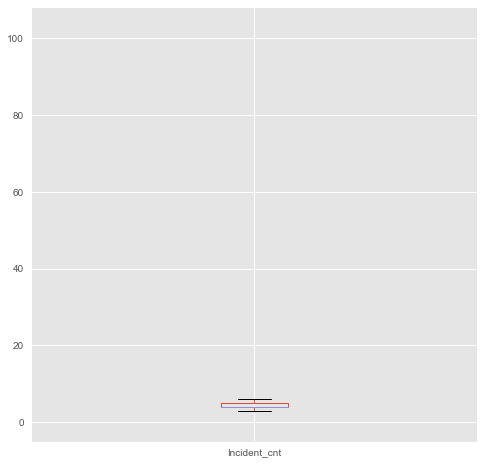

In [173]:
train_df.Incident_cnt.plot(kind = 'box', figsize = (8, 8))

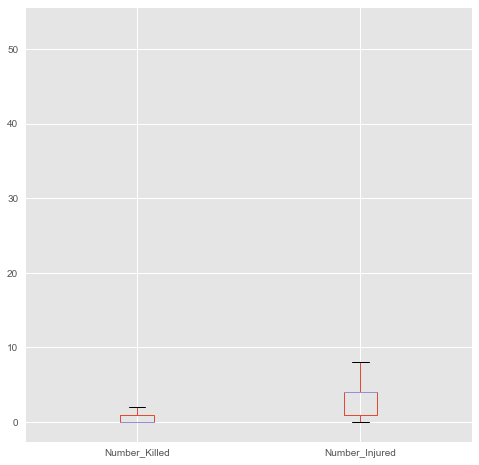

In [174]:
train_df[ ['Number_Killed', 'Number_Injured'] ].plot(kind = 'box', figsize = (8, 8))

##### Based on the above box, there is no outliers found in the train set. Next, display in historgram to see the distribution. However, even without doing this, I already think it is impossible the data has normal distribution or even close. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1177fea10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117ae1610>]], dtype=object)

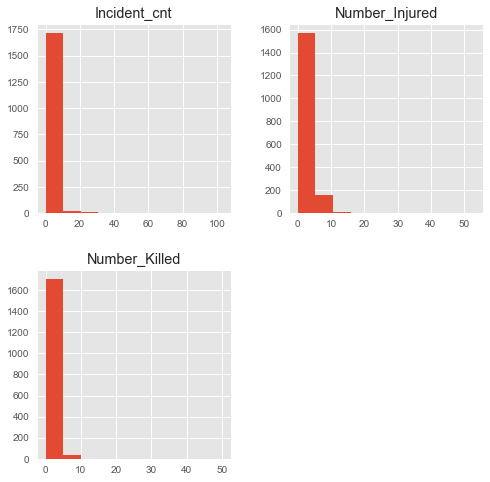

In [175]:
train_df[ ['Incident_cnt','Number_Killed','Number_Injured'] ].hist(figsize = (8, 8))

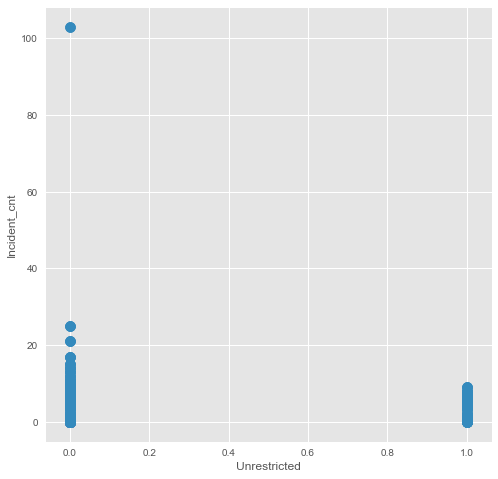

In [307]:
train_df.plot(kind = 'scatter', x = 'Unrestricted', y = 'Incident_cnt', s = 100, figsize = (8, 8))

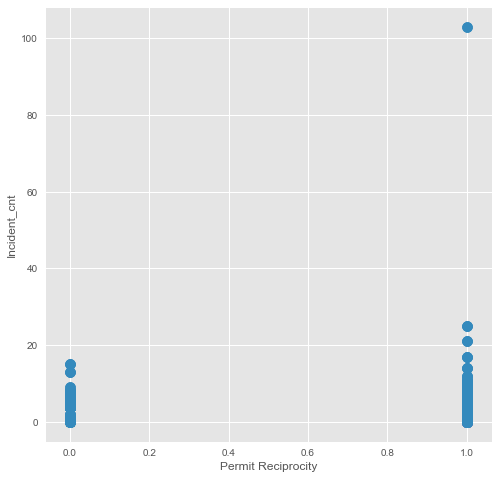

In [308]:
train_df.plot(kind = 'scatter', x = 'Permit Reciprocity', y = 'Incident_cnt', s = 100, figsize = (8, 8))

##### I want to find a correlation across variables, including permit yes/no. In order to do that, I am going to convert the binary string values of these columns to number 0/1. This is called one-hot encoded (I believe)

In [214]:
train_df['Permit Reciprocity'] = (train_df['Permit Reciprocity'] == "Yes")*1
train_df['Unrestricted'] = (train_df['Unrestricted'] == "Yes")*1

In [232]:
train_df.corr()

,Number_Killed,Number_Injured,Unrestricted,Permit Reciprocity,Year,Incident_cnt
Number_Killed,1.000000,0.331433,0.082881,0.086829,0.048819,0.736686
Number_Injured,0.331433,1.000000,-0.101023,-0.070030,0.162019,0.882176
Unrestricted,0.082881,-0.101023,1.000000,0.171690,0.032771,-0.031039
Permit Reciprocity,0.086829,-0.070030,0.171690,1.000000,0.022933,-0.006855
Year,0.048819,0.162019,0.032771,0.022933,1.000000,0.140494
Incident_cnt,0.736686,0.882176,-0.031039,-0.006855,0.140494,1.000000


##### From the correlation table above, it doesn't seem to have significant correlation across variables: incident_cnt vs permit reciprocity or incident_cnt vs Unrestricted. However, from the scatter plot above, the number of incident_cnt is higher when unrestricted is not true, while it is higher when permit reciprocity is true. Why is it? 
##### Reciprocity means that two (or more) states have an agreement to honor each other’s concealed carry permits. Does it mean people have more tendency to cause incident in a different state from their original? Logically, it doesn make sense but how to prove this hypothesis with the current dataset?

##### Trying to use chisquare to find the relation across these 2 category variables: Permit Reciprocity vs. Unrestricted

In [252]:
from scipy.stats import chisquare
chisquare(train_df['Incident_cnt'])

Power_divergenceResult(statistic=7064.0626175759207, pvalue=0.0)

# Part_4:  Modeling & Training

### 4.1: Testing with Trees Model

In [281]:
#permit_reciprocity = pd.get_dummies(train_df['Permit Reciprocity'])
#campus_carried = pd.get_dummies(train_df['Campus_Carried'])
#Unrestricted = pd.get_dummies(train_df['Unrestricted'])
#shall_issue = pd.get_dummies(train_df['Shall-issue'])
#may_issue = pd.get_dummies(train_df['May-issue'])
#no_issue = pd.get_dummies(train_df['No-issue'])

In [296]:
#X = pd.concat((permit_reciprocity,campus_carried,shall_issue,may_issue,no_issue),axis=1)
#X = pd.concat((permit_reciprocity,Unrestricted),axis=1)
X = train_df[['Unrestricted','Permit Reciprocity']]
X

,Unrestricted,Permit Reciprocity
1488,0,1
1765,0,1
1002,0,1
2078,0,1
843,0,1
1040,0,1
299,0,0
144,0,1
1998,0,1
2070,0,1


In [297]:
c = train_df.Incident_cnt

In [298]:
from sklearn import tree, externals

%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


In [299]:
model = tree.DecisionTreeClassifier().fit(X,c)

In [300]:
model.score(X,c)

0.46765884373211219

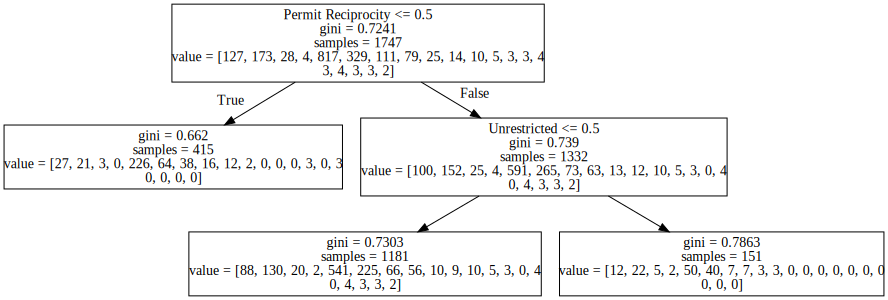

In [301]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

### Testing with k-nearest